### <u>**WQD7003 Data Analytics Group 8 Project**</u>


Names & Matric Numbers of Group:
*   Callum Joseph Smith (23117947) - Basic EDA, Organisation (GitHub, compiling), Demo.
*   Chadli Rayane (24075296) - Cleaning, EDA, Demo
*   Chew Hong Ern (24200538) - Group leader: Task Distribution, cleaning and missing data analysis.
*   Lim Chun Keat (24201315) - Linear Regression modelling & Evaluation
*   Yap Hui Qing (24080940) - Detailed EDA
*   Yeoh Li Ting (23079401) - Clustering modelling & Evaluation

# Step 0: Imports for Project

In [1]:
import sys
import subprocess

def install_requirements(requirements_file="requirements.txt"):
    """
    Installs packages from our requirements.txt file
    """
    try:
        with open(requirements_file, 'r') as f:
            required_packages = [line.strip() for line in f if line.strip() and not line.strip().startswith('#')]

        installed_packages_output = subprocess.run([sys.executable, "-m", "pip", "freeze"], capture_output=True, text=True, check=True)
        installed_packages = set()
        for line in installed_packages_output.stdout.splitlines():
            if '==' in line:
                pkg_name = line.split('==')[0].strip()
                installed_packages.add(pkg_name)
            elif '@' in line: # For editable installs like -e .
                pkg_name = line.split('=')[0].strip()
                installed_packages.add(pkg_name)
            else: # For other cases, try to extract name
                pkg_name = line.strip()
                installed_packages.add(pkg_name)


        packages_to_install = []
        for req in required_packages:
            # Handle cases with version specifiers (e.g., package==1.0, package>=1.0)
            pkg_name = req
            if '==' in req:
                pkg_name = req.split('==')[0].strip()
            elif '>=' in req:
                pkg_name = req.split('>=')[0].strip()
            elif '<=' in req:
                pkg_name = req.split('<=')[0].strip()
            elif '>' in req:
                pkg_name = req.split('>')[0].strip()
            elif '<' in req:
                pkg_name = req.split('<')[0].strip()
            elif '~=' in req:
                pkg_name = req.split('~=')[0].strip()

            if pkg_name not in installed_packages:
                packages_to_install.append(req)

        if packages_to_install:
            print(f"Installing missing packages: {', '.join(packages_to_install)}")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", requirements_file])
            print("All packages from requirements.txt installed successfully.")
        else:
            print("All packages from requirements.txt are already installed.")

    except FileNotFoundError:
        print(f"Error: The file '{requirements_file}' was not found.")
    except subprocess.CalledProcessError as e:
        print(f"Error during pip installation: {e}")
        print(f"Output: {e.stdout}")
        print(f"Error Output: {e.stderr}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Install Requirements...
install_requirements()

All packages from requirements.txt are already installed.


In [37]:
# System & Environment
import os
import time 
from datetime import datetime
import re
import warnings
import torch
from pathlib import Path

# Data Handling
import pandas as pd
import numpy as np
from scipy.stats import zscore
import kagglehub


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd

# Natural Language Processing
import nltk

# Machine Learning - Preprocessing & Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Machine Learning - Evaluation & Feature Selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Consider two methods at this step
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor

# Step 1: Directory Creation

In [3]:
# Define project root
project_root = Path.cwd().parent

# Defining Output paths..
Raw_Datasets_Path   = project_root / '1. Raw Datasets'              # Raw Datasets
Clean_Datasets_Path = project_root / '2. Cleaned Datasets'          # Cleaned datasets
Dataset_Path        = Clean_Datasets_Path / "FAOSTAT_Cleaned.xlsx"  # Dataset Check
Documentation_Path  = Clean_Datasets_Path / 'Documentation'         # Documented cleaning steps
Code_Path           = project_root / '3. Code'                      # Where the code is saved also known as "Path.cwd()"
Save_Path           = project_root / '4. Saved Output'              # Saving of outputs.
Runtime_file        = Save_Path / "last_runtime.txt"                # Requirements file

# Print main paths (only printing those defined above)
print(
    f"Raw Datasets Path:      {Raw_Datasets_Path}\n"
    f"Cleaned Datasets Path:  {Clean_Datasets_Path}\n"
    f"Dataset Check Path:     {Dataset_Path}\n"
    f"Code Path:              {Code_Path}\n"
    f"Saved Output Path:      {Save_Path}\n"
    f"Runtime File Path:      {Runtime_file}"
)

# Show last recorded duration
try:
    with open("last_runtime.txt", "r") as f:
        last_time = float(f.read())
        print(f"Last run took {last_time:.2f} seconds")
except FileNotFoundError:
    print("No previous runtime recorded.")

### Starting timer
start_time = time.time() 
print(f"Timer Started at {datetime.now().strftime('%H:%M:%S')}")


Raw Datasets Path:      C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\1. Raw Datasets
Cleaned Datasets Path:  C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\2. Cleaned Datasets
Dataset Check Path:     C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\2. Cleaned Datasets\FAOSTAT_Cleaned.xlsx
Code Path:              C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\3. Code
Saved Output Path:      C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\4. Saved Output
Runtime File Path:      C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semeste

# 2. Data PreProcessing of FAOSTAT

## 2.0 Initial Cleaning:

In [4]:
# ==== Continent list ====
asia = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain",
    "Bangladesh", "Bhutan", "Brunei",
    "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel",
    "Japan", "Jordan", "Kazakhstan", "Kuwait",
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia",
    "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal",
    "North Korea", "Oman", "Pakistan",
    "Palestine", "Philippines", "Qatar",
    "Saudi Arabia", "Singapore", "South Korea",
    "Sri Lanka", "Syria", "Taiwan", "Tajikistan",
    "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates",
    "Uzbekistan", "Vietnam", "Yemen"
]

africa = [
    "Algeria", "Angola", "Benin", "Botswana",
    "Burkina Faso", "Burundi", "Cabo Verde",
    "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Republic of the Congo",
    "Democratic Republic of the Congo",
    "Côte d'Ivoire", "Djibouti", "Egypt",
    "Equatorial Guinea",
    "Eritrea", "Eswatini", "Ethiopia", "Gabon",
    "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Libya",
    "Madagascar", "Malawi", "Mali", "Mauritania",
    "Mauritius", "Morocco", "Mozambique",
    "Namibia", "Niger", "Nigeria", "Rwanda",
    "São Tomé and Príncipe", "Senegal",
    "Seychelles", "Sierra Leone", "Somalia", "South Africa",
    "South Sudan", "Sudan", "Tanzania",
    "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
]

europe = [
    "Albania", "Andorra", "Austria", "Belarus",
    "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus",
    "Czech Republic", "Denmark", "Estonia", "Finland",
    "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Kosovo",
    "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco",
    "Montenegro", "Netherlands",
    "North Macedonia", "Norway", "Poland", "Portugal",
    "Romania", "Russia", "San Marino",
    "Serbia", "Slovakia", "Slovenia", "Spain",
    "Sweden", "Switzerland", "Ukraine", "United Kingdom"
]

north_america = [
    "Antigua and Barbuda", "Bahamas", "Barbados",
    "Belize", "Canada", "Costa Rica",
    "Cuba", "Dominica", "Dominican Republic",
    "El Salvador", "Grenada", "Guatemala",
    "Haiti", "Honduras", "Jamaica", "Mexico",
    "Nicaragua", "Panama", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines",
    "Trinidad and Tobago", "United States"
]

south_america = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
    "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
]

In [5]:
# ==== Helper functions ====

def safe_float(x):
    """Safely convert input to float, handling interval strings and errors."""
    if isinstance(x, (int, float)):
        return float(x)
    try:
        if isinstance(x, str) and x.startswith("<"):
            return float(x[1:])
        x = x.replace(",", "")  # Remove commas like "1,000"
        return float(x)
    except (ValueError, TypeError, AttributeError):
        return float('nan')


def find_continents(country):
    if country in europe:
        return 'Europe'
    if country in asia:
        return 'Asia'
    if country in africa:
        return 'Africa'
    if country in north_america:
        return 'North_America'
    if country in south_america:
        return 'South_America'
    return None


def replace_none(x):
    return "index" if pd.isna(x) else x


def impute_missing_values(dataframe, group_cols, merge_cols):
    """Impute missing 'Value' by grouping on group_cols, merging on merge_cols."""
    results = []
    for item in dataframe.loc[dataframe['Value'].isna(), 'Item'].unique():
        filtered = dataframe[dataframe['Item'] == item]
        grouped = filtered.groupby(group_cols).agg({
            'Flag Description': 'first',
            'Unit': 'first',
            'Value': 'mean',
            'Item': 'first'
        }).reset_index()
        results.append(grouped)

    if results:
        patch = pd.concat(results, ignore_index=True)
        dataframe = dataframe.merge(
            patch[merge_cols + ['Value']],
            on=merge_cols,
            how='left',
            suffixes=('', '_patch')
        )
        dataframe['Value'] = dataframe['Value'].fillna(dataframe['Value_patch'])
        dataframe.drop('Value_patch', axis=1, inplace=True)

    return dataframe


def expand_year(row):
    y = row["Year"]
    if isinstance(y, str) and "-" in y:
        start, end = map(int, y.split("-"))
        expanded_rows = []
        for yr in range(start, end + 1):
            new_row = row.copy()
            new_row["Year"] = str(yr)
            expanded_rows.append(new_row)
        return expanded_rows
    else:
        return [row]

print('Functions ready')

Functions ready


## 2.1 Basic Dataset Statistics

In [6]:
# 1. Check if Cleaned Dataset Already Exists
Cleaned_Data = os.path.join(Clean_Datasets_Path, "FAOSTAT_Cleaned.xlsx")
if not os.path.exists(Dataset_Path):

    # Load raw data
    faostat_data = pd.read_csv(os.path.join(Raw_Datasets_Path, "FAOSTAT_data.csv"))

    # Convert Value column safely
    faostat_data['Value'] = faostat_data['Value'].apply(
        lambda x: safe_float(x) if not isinstance(x, (float, int)) else float(x)
    )

    # Drop irrelevant columns
    faostat_data.drop(['Domain Code', 'Domain', 'Element Code',
                       'Element', 'Item Code', 'Year Code',
                       'Note', 'Flag'], axis=1, inplace=True)

    # Assign continents based on Area
    faostat_data['continents'] = faostat_data['Area'].apply(find_continents)

    # Replace None in Unit with "index"
    faostat_data['Unit'] = faostat_data['Unit'].apply(replace_none)

    # Group by Year, Item, continents, Area - aggregate for imputation
    faostat_data = faostat_data.groupby(['Year', 'Item', 'continents', 'Area']).agg({
        'Flag Description': 'first',
        'Unit': 'first',
        'Value': 'mean'
    }).reset_index()

    # First imputation by Year and continents
    faostat_data = impute_missing_values(
        faostat_data,
        group_cols=['Year', 'continents'],
        merge_cols=['Year', 'Item', 'continents']
    )

    # Second imputation by Year and Area
    faostat_data = impute_missing_values(
        faostat_data,
        group_cols=['Year', 'Area'],
        merge_cols=['Year', 'Item', 'Area']
    )

    # Drop rows with no valid values (at least one non-NaN in any column)
    faostat_data.dropna(axis=0, how='all', subset=['Value'], inplace=True)

    # Pivot data: Items become columns
    pivot_df = faostat_data.pivot_table(
        index=['Year', 'continents', 'Area', 'Flag Description'],
        columns='Item',
        values='Value'
    ).reset_index()

    # Expand rows with year intervals like "1990-1992"
    expanded_rows = []
    for _, row in pivot_df.iterrows():
        expanded_rows.extend(expand_year(row))
    df_expanded = pd.DataFrame(expanded_rows)

    # Group and take first non-null to remove duplicates after expansion
    key_cols = ['Year', 'Continent', 'Area', 'Flag Description']
    df_merged = df_expanded.groupby(key_cols, as_index=False).first()

    # Identify columns with conflicting flags
    value_columns = [col for col in df_merged.columns if col not in key_cols]
    conflict_columns = {}
    for col in value_columns:
        sub_df = df_merged[[col, 'Flag Description']].dropna(subset=[col])
        if len(sub_df['Flag Description'].unique()) > 1:
            conflict_columns[col] = sub_df['Flag Description'].unique().tolist()

    conflicted_cols = list(conflict_columns.keys())
    non_conflicted_cols = [col for col in value_columns if col not in conflicted_cols]

    # Flag priority map
    flag_priority = {
        'Official figure': 0,
        'Estimated value': 1,
        'Figure from international organizations': 2
    }

    df_merged['Flag Rank'] = df_merged['Flag Description'].map(flag_priority)

    # Resolve conflicts: keep value with highest priority flag per group
    df_conflicted = (
        df_merged[['Year', 'continents', 'Area', 'Flag Rank'] + conflicted_cols]
        .sort_values(by=['Year', 'continents', 'Area', 'Flag Rank'])
        .groupby(['Year', 'continents', 'Area'], as_index=False)
        .first()
    )

    # For non-conflicted columns: take first
    df_non_conflicted = (
        df_merged[['Year', 'continents', 'Area'] + non_conflicted_cols]
        .groupby(['Year', 'continents', 'Area'], as_index=False)
        .first()
    )

    # Merge final resolved data
    df_final = pd.merge(df_non_conflicted, df_conflicted, on=['Year', 'continents', 'Area'], how='outer')
    df_final.drop(columns=['Flag Rank'], inplace=True)

    # Sort columns: keys first, then others alphabetically
    group_keys = ['Year', 'continents', 'Area']
    other_cols = sorted([col for col in df_final.columns if col not in group_keys])
    df_final = df_final[group_keys + other_cols]

    # Ensure output directory exists
    os.makedirs(Cleaned_Datasets_Path, exist_ok=True)

    # Save the final cleaned dataset
    df_final.to_excel(Dataset_Path, index=False)
    print("Cleaned dataset saved to", Dataset_Path)
    # print(df_final.head())

else:
    print("Cleaned dataset already exists, skipping processing.")
    # print(pd.read_excel(Cleaned_Data).head())

Cleaned dataset already exists, skipping processing.


In [29]:
# Load first stage of cleaned FAOSTAT data
df = pd.read_excel(Cleaned_Data)

# Basic dataset statistics
num_rows = df.shape[0]
num_cols = df.shape[1]
total_values = df.size
missing_values = df.isnull().sum().sum()
missing_percent = (missing_values / total_values) * 100

# Column type summary
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categoric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n********** Dataset Summary: **********\n")
print(f"- Rows: {num_rows}")
print(f"- Columns: {num_cols}")
print(f"- Total Values: {total_values}")
print(f"- Missing Values: {missing_values} ({missing_percent:.2f}%)")

print(f"\nColumn Types Summary:")
print(f"- Numeric Columns ({len(numeric_cols)}): {numeric_cols}")
print(f"- Categorical/Text Columns ({len(categoric_cols)}): {categoric_cols}")

print(df.info())
print(df.describe())


********** Dataset Summary: **********

- Rows: 3768
- Columns: 52
- Total Values: 195936
- Missing Values: 41877 (21.37%)

Column Types Summary:
- Numeric Columns (50): ['Year', 'Average dietary energy requirement (kcal/cap/day)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Cereal import dependency ratio (percent) (3-year average)', 'Coefficient of variation of habitual caloric consumption distribution (real number)', 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)', 'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)', 'Gross domestic product per capita, PPP, (constant 2017 international $)', 'Incidence of caloric losses at retail distribution level (percent)', 'Mini

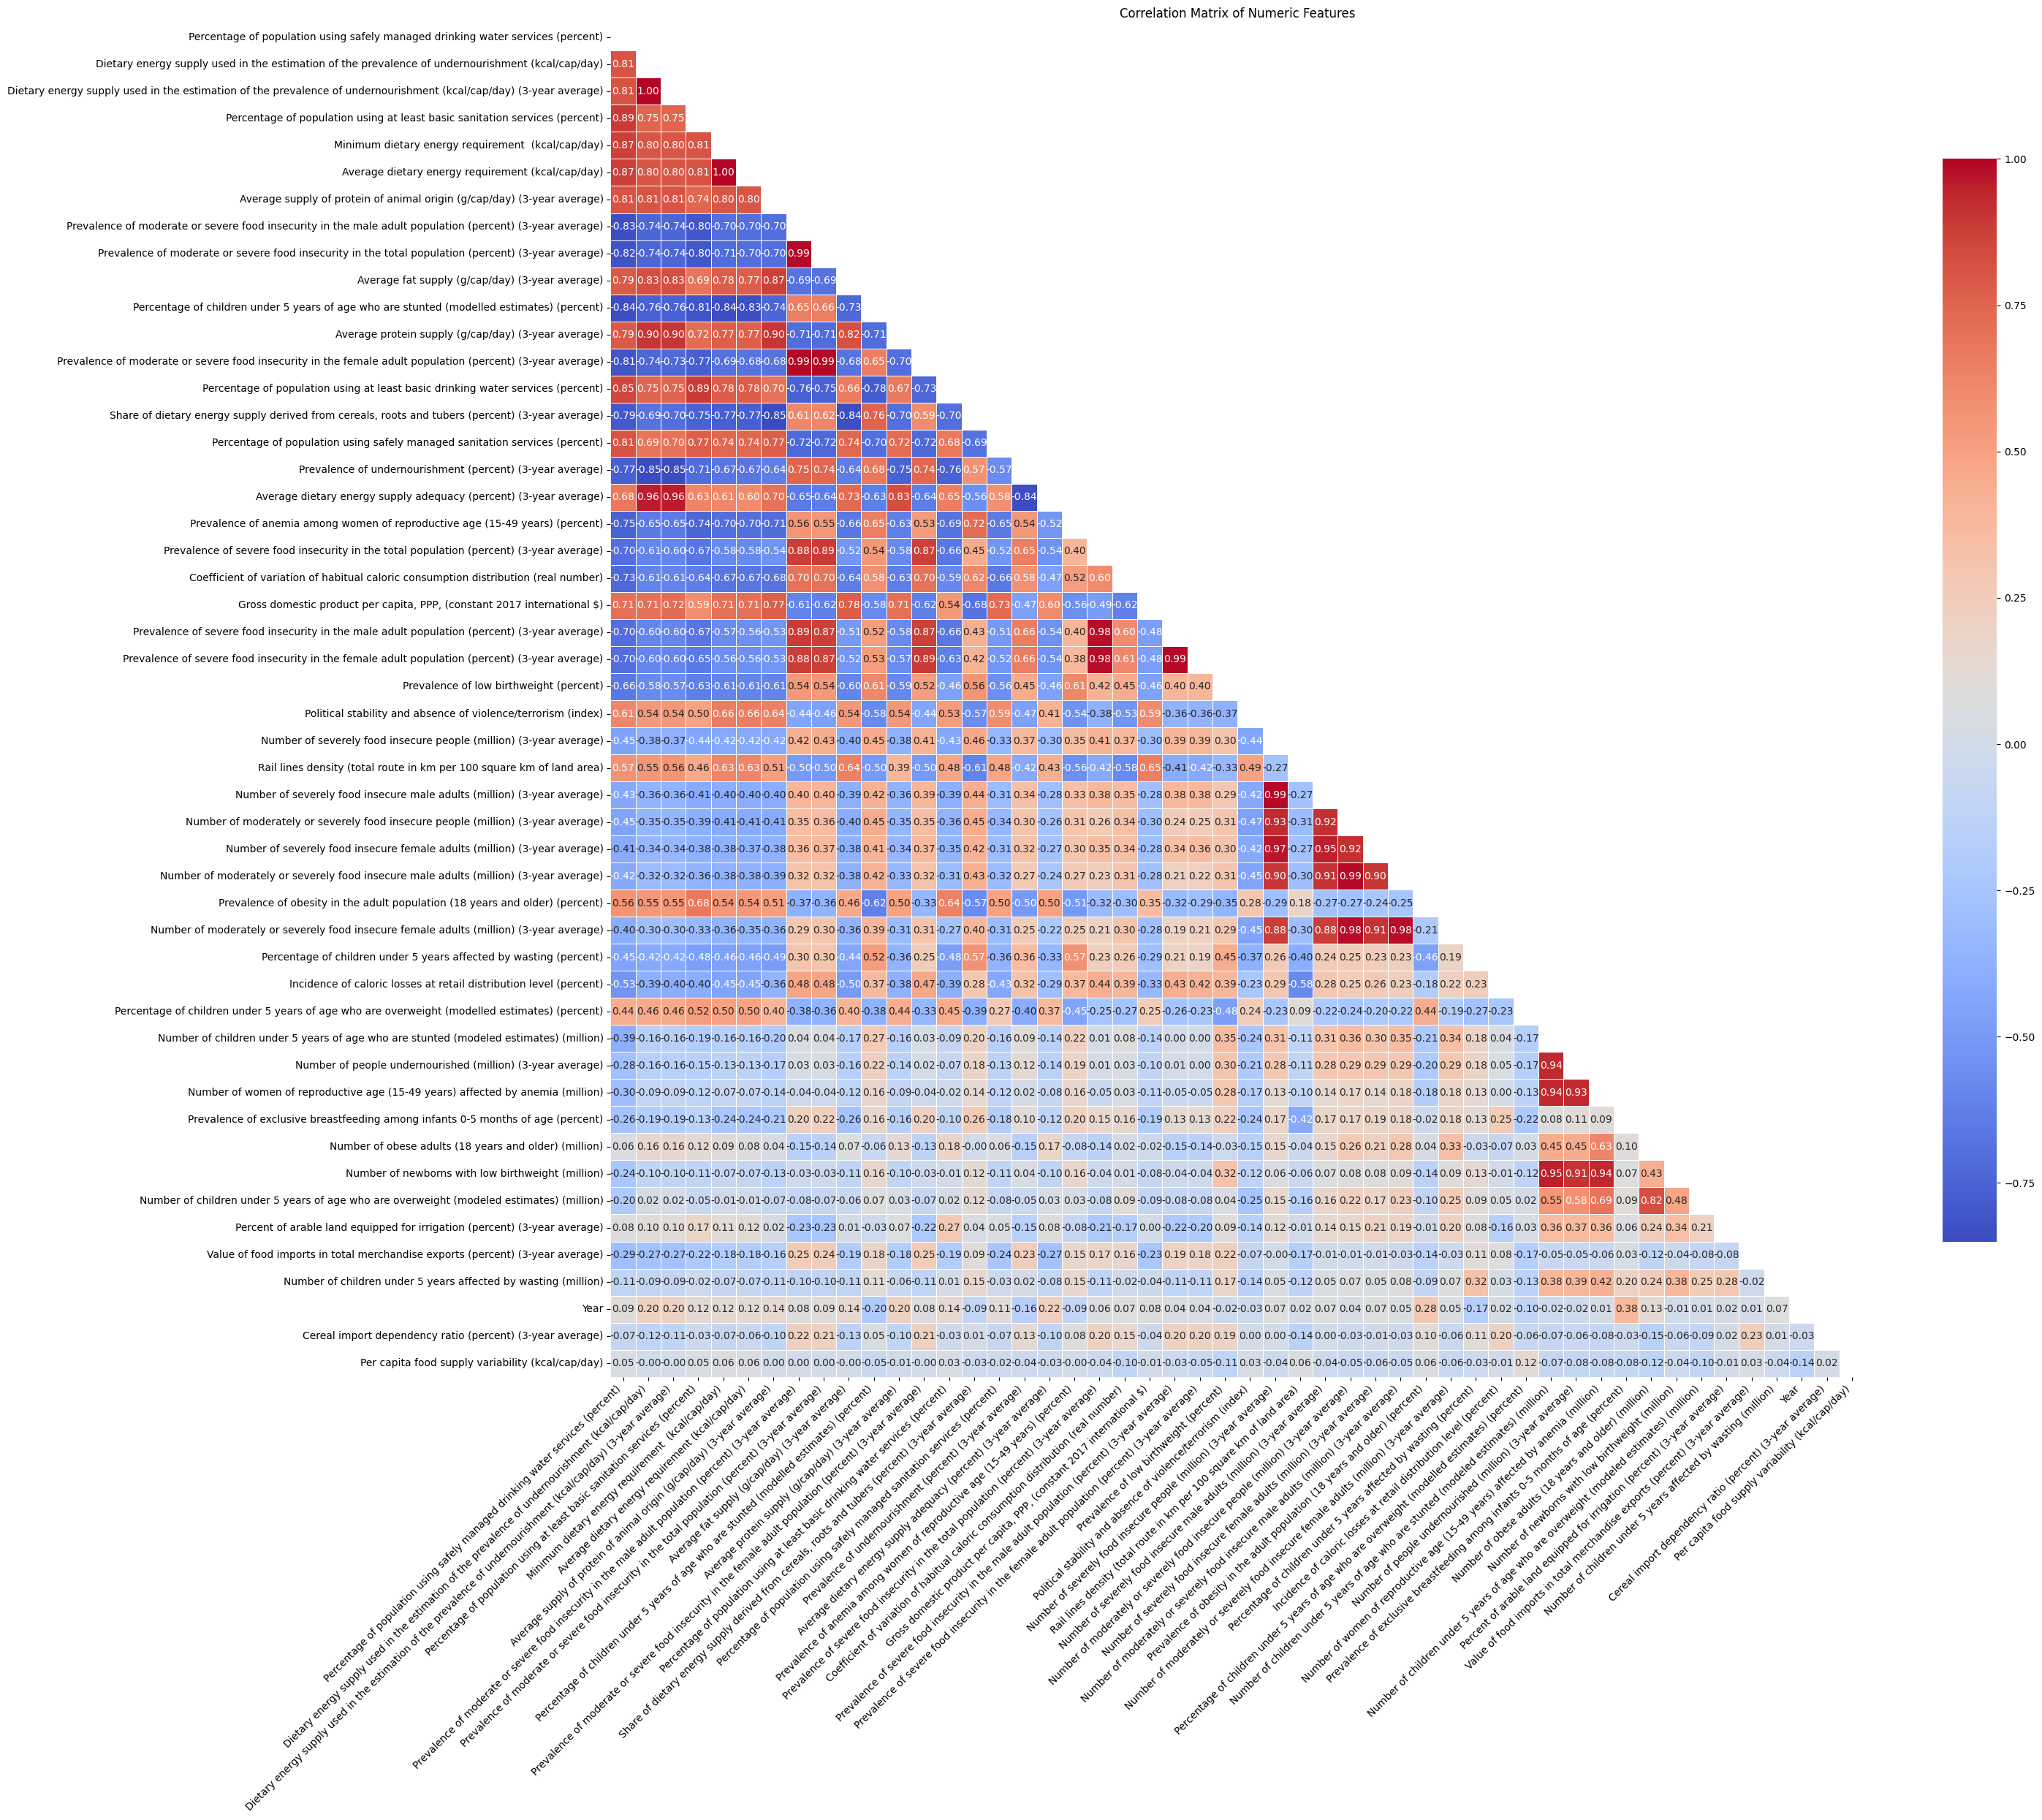

In [30]:
# Compute the correlation matrix and sort it
correlation_matrix = df[numeric_cols].corr().round(2)
sorted_cols = correlation_matrix.abs().sum().sort_values(ascending=False).index
correlation_matrix = correlation_matrix.loc[sorted_cols, sorted_cols]

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot
plt.figure(figsize=(len(correlation_matrix) * 0.6, len(correlation_matrix) * 0.5))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 2.2 Missing Obersvations

### 2.2.1 Removing unecessary Columns & those with high missing % 

In [7]:
df = pd.read_excel(Dataset_Path)

df.head()

,Year,Continent,Area,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Prevalence of severe food insecurity in the female adult population (percent) (3-year average),Prevalence of severe food insecurity in the male adult population (percent) (3-year average),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,2000,Africa,Algeria,2308.0,126.0,67.0,77.7,19.3,79.7,0.30,...,NaN,NaN,13.4,NaN,NaN,NaN,7.5,0.2,59.0,13.0
1,2000,Africa,Angola,2121.0,74.0,39.4,40.9,12.8,57.1,0.30,...,NaN,NaN,5.3,NaN,NaN,NaN,67.4,NaN,66.0,7.0
2,2000,Africa,Benin,2165.0,108.0,48.5,56.2,9.5,13.0,0.28,...,NaN,NaN,4.5,NaN,NaN,NaN,17.2,NaN,72.0,59.0
3,2000,Africa,Botswana,2286.0,98.0,48.4,66.5,25.6,90.9,0.24,...,NaN,NaN,10.0,NaN,NaN,NaN,23.7,NaN,50.0,12.0
4,2000,Africa,Burkina Faso,2183.0,108.0,53.2,69.6,9.7,9.0,0.34,...,NaN,NaN,1.4,NaN,NaN,NaN,22.7,0.2,65.0,52.0


In [8]:
# Remove intuitively identical columns
cols_to_drop = ["Average dietary energy supply adequacy (percent) (3-year average)",
                "Minimum dietary energy requirement  (kcal/cap/day)",
                "Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)",
                "Number of people undernourished (million) (3-year average)",
                "Coefficient of variation of habitual caloric consumption distribution (real number)",
                "Number of moderately or severely food insecure female adults (million) (3-year average)",
                "Number of moderately or severely food insecure male adults (million) (3-year average)",
                "Number of moderately or severely food insecure people (million) (3-year average)",
                "Number of children under 5 years of age who are stunted (modeled estimates) (million)",
                "Number of children under 5 years affected by wasting (million)",
                "Number of children under 5 years of age who are overweight (modeled estimates) (million)",
                "Number of severely food insecure people (million) (3-year average)",
                "Number of severely food insecure female adults (million) (3-year average)",
                "Number of severely food insecure male adults (million) (3-year average)",
                "Number of newborns with low birthweight (million)",
                "Number of women of reproductive age (15-49 years) affected by anemia (million)",
                "Number of obese adults (18 years and older) (million)"
                ]

df = df.drop(columns= cols_to_drop, axis=1)

In [9]:
df_new = df[df["Year"]>=2014].reset_index()

In [10]:
# Shows number and percentage of missing values for each column
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

,Missing Count,Missing %
Rail lines density (total route in km per 100 square km of land area),1078,68.66
Percentage of population using safely managed drinking water services (percent),678,43.18
Prevalence of anemia among women of reproductive age (15-49 years) (percent),628,40.00
Percentage of population using safely managed sanitation services (percent),622,39.62
Prevalence of low birthweight (percent),471,30.00
Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),403,25.67
Cereal import dependency ratio (percent) (3-year average),271,17.26
Percentage of children under 5 years affected by wasting (percent),264,16.82
Percentage of population using at least basic sanitation services (percent),226,14.39
Percentage of population using at least basic drinking water services (percent),221,14.08


In [11]:
## Drop due to high missing percentage

columns_to_remove = [
    "Rail lines density (total route in km per 100 square km of land area)",
    "Prevalence of low birthweight (percent)",
    "Prevalence of anemia among women of reproductive age (15-49 years) (percent)",
    "Percentage of population using safely managed sanitation services (percent)",
    "Percentage of population using safely managed drinking water services (percent)"
]

df_new = df_new.drop(columns=columns_to_remove)

In [12]:
# cols = ["Percentage of population using at least basic drinking water services (percent)",
#     "Percentage of population using at least basic sanitation services (percent)",
#     "Percentage of population using safely managed drinking water services (percent)",
#     "Percentage of population using safely managed sanitation services (percent)"]

In [13]:
df_new["Water & Sanitation Index (percent)"] = df_new[[
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]].mean(axis=1)

df_new["Moderate+Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1)  


df_new["Severe Food Insecurity (percent)"] = df_new[[
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)"
]].mean(axis=1) 

In [14]:
columns_to_remove = [
    "Prevalence of severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of severe food insecurity in the male adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)",
    "Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)",
    "Percentage of population using at least basic drinking water services (percent)",
    "Percentage of population using at least basic sanitation services (percent)"
]

# Drop the specified columns
df_new = df_new.drop(columns=columns_to_remove)

### 2.2.2 Creating a series of missing data indicator for checking MAR assumption

In [15]:
for col in df_new.columns:
    df_new[f'{col}_missing'] = df_new[col].isnull().astype(int)

In [17]:
# Check corraltion between missing data indicator and other variables
excluded_columns = ['Year', 'Continent', 'Area']  
df_filtered = df_new.drop(columns=excluded_columns)


correlation_matrix = df_filtered.corr()

In [18]:
# Just print the need part for corraltion checking 

missing_columns = [col for col in df_new.columns if col.endswith('_missing') and col not in ['Year_missing', 'continents_missing', 'Area_missing']]
cor_missingness = correlation_matrix[missing_columns]

df_corr = cor_missingness


In [19]:
df_corr_filtered = df_corr[~df_corr.index.str.endswith('_missing')]
# df_corr_filtered

In [21]:
## For documentation

(df_corr).to_csv(Path(Documentation_Path) / "missing_corr.csv", index=True)
(df_corr_filtered).to_csv(Path(Documentation_Path) / "missing_corr_with_other_variables_only.csv", index= True)

In [22]:
# Check correlation between missing indicator and the variables (plot 1)

# df_corr_filtered.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

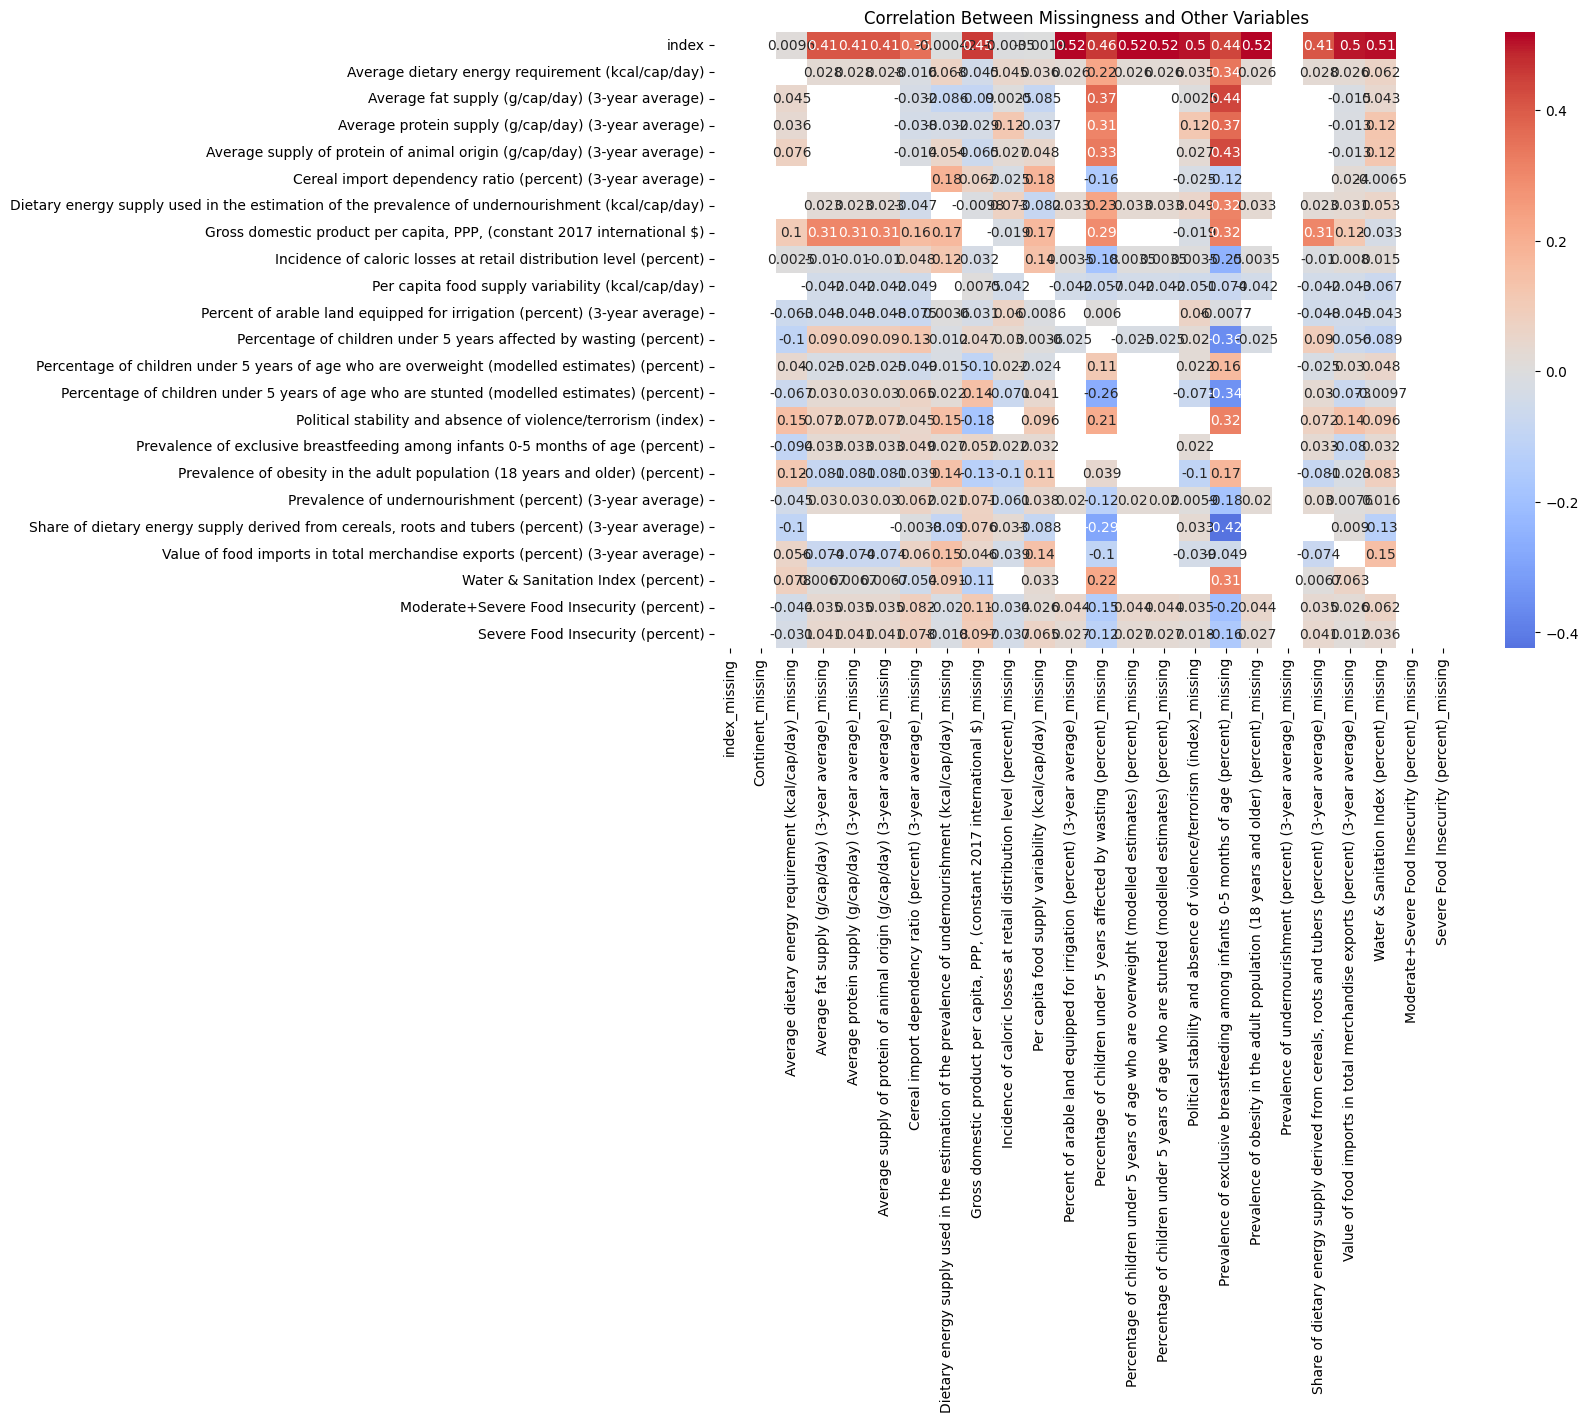

In [23]:
# Check correlation between missing indicator and the variables (plot 2)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Missingness and Other Variables')
plt.show()

### 2.2.3 Check missingness after dropping and aggregating 
df_new is for modelling, df is for EDA

In [33]:
## Checking missingness after dropping and aggregating 
missing_counts = df_new.isnull().sum()
missing_percent = (df_new.isnull().sum() / len(df_new)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

missing_df

,Missing Count,Missing %
Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),403,25.67
Cereal import dependency ratio (percent) (3-year average),271,17.26
Percentage of children under 5 years affected by wasting (percent),264,16.82
Average fat supply (g/cap/day) (3-year average),213,13.57
Average supply of protein of animal origin (g/cap/day) (3-year average),213,13.57
Average protein supply (g/cap/day) (3-year average),213,13.57
"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",213,13.57
Water & Sanitation Index (percent),211,13.44
"Gross domestic product per capita, PPP, (constant 2017 international $)",205,13.06
Per capita food supply variability (kcal/cap/day),170,10.83


## 2.3 Imputation

In [34]:
# Define the target columns (missingness between 9% -30%)
columns_to_impute = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Cereal import dependency ratio (percent) (3-year average)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Per capita food supply variability (kcal/cap/day)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
    'Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent)',
    'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)',
    'Prevalence of obesity in the adult population (18 years and older) (percent)',
    'Percentage of children under 5 years affected by wasting (percent)',
    'Average dietary energy requirement (kcal/cap/day)',
    'Incidence of caloric losses at retail distribution level (percent)'
]


### 2.3.1 Group based on country for temporal consistency 
Using BayesianRidge for imputation

### 2.3.2 Compared with RandomForestRegressor

In [38]:
# Filter out the columns to be imputed
df_subset = df_new[columns_to_impute].copy()

# Initialize MICE
br_imputer = IterativeImputer(
    estimator=BayesianRidge(),  # Chosen because of the linear relationship between variables
    max_iter=10,                
    random_state=42,
    imputation_order='ascending' 
) 

# Fit and transform the data
df_br_imputed = pd.DataFrame(br_imputer.fit_transform(df_subset), columns=columns_to_impute)

C:\Users\Callum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [39]:
df_br_imputed.head()

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),...,Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
0,13.000000,22.900000,70.2,99.4,94.9,29.8,48.0,90.0,13515.3,45.0,...,2.9,3437.0,11.1,49.2,12.5,0.5,19.7,6.909091,2321.0,3.59
1,17.197222,45.919444,65.6,57.4,55.4,22.0,60.0,50.0,10262.8,168.0,...,13.2,2553.0,34.1,49.2,3.1,0.1,9.0,6.909091,2129.0,3.92
2,10.433333,55.000000,44.2,51.2,70.1,17.5,66.0,41.0,3104.2,11.0,...,9.3,2656.0,33.1,41.4,1.7,0.3,8.6,4.500000,2204.0,3.50
3,18.433333,46.466667,95.5,74.4,71.7,32.2,48.0,80.5,16381.1,9.0,...,20.8,2550.0,23.2,49.2,10.5,0.0,15.3,6.909091,2334.0,3.14
4,17.197222,45.919444,13.8,61.5,76.4,12.3,65.0,35.5,2094.1,20.0,...,13.5,2648.0,29.9,50.1,1.8,0.2,4.2,8.500000,2198.0,2.17


In [40]:
df_subset.corr().style.background_gradient(cmap='coolwarm')

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
Severe Food Insecurity (percent),1.000000,0.886313,0.201873,-0.519361,-0.579887,-0.537831,0.436770,-0.678803,-0.487238,-0.040915,0.181883,-0.367415,0.661184,-0.608120,0.533865,0.135878,-0.247972,-0.208284,-0.310360,0.209053,-0.567178,0.431058
Moderate+Severe Food Insecurity (percent),0.886313,1.000000,0.210809,-0.687508,-0.708868,-0.694770,0.605810,-0.796005,-0.620162,0.000598,0.249293,-0.450838,0.743862,-0.742745,0.655844,0.208029,-0.356543,-0.228415,-0.355241,0.283785,-0.697076,0.474868
Cereal import dependency ratio (percent) (3-year average),0.201873,0.210809,1.000000,-0.135492,-0.125081,-0.136590,0.061546,-0.075331,-0.057537,0.009816,0.236614,-0.026678,0.174859,-0.127367,0.108031,0.026378,-0.016485,0.037502,0.075146,0.142776,-0.072036,0.202516
Average fat supply (g/cap/day) (3-year average),-0.519361,-0.687508,-0.135492,1.000000,0.806395,0.870435,-0.856342,0.678346,0.768722,-0.028573,-0.244987,0.539945,-0.624079,0.823038,-0.700713,-0.385812,0.430981,0.009686,0.415154,-0.469472,0.764099,-0.543364
Average protein supply (g/cap/day) (3-year average),-0.579887,-0.708868,-0.125081,0.806395,1.000000,0.908567,-0.730768,0.717874,0.694200,-0.060138,-0.201111,0.538180,-0.741233,0.890474,-0.708398,-0.299496,0.454866,0.055253,0.423783,-0.371631,0.764230,-0.415113
Average supply of protein of animal origin (g/cap/day) (3-year average),-0.537831,-0.694770,-0.136590,0.870435,0.908567,1.000000,-0.864460,0.732567,0.756858,-0.028565,-0.172972,0.649952,-0.632309,0.809423,-0.744034,-0.336616,0.427915,0.008063,0.464735,-0.526674,0.805326,-0.420884
"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",0.436770,0.605810,0.061546,-0.856342,-0.730768,-0.864460,1.000000,-0.733348,-0.672861,0.013322,0.088879,-0.583973,0.533263,-0.693306,0.735810,0.361250,-0.430391,0.030617,-0.556496,0.582223,-0.790086,0.361528
Water & Sanitation Index (percent),-0.678803,-0.796005,-0.075331,0.678346,0.717874,0.732567,-0.733348,1.000000,0.577585,-0.084896,-0.189078,0.538497,-0.750421,0.765340,-0.776032,-0.199578,0.540486,0.229612,0.655974,-0.469196,0.799497,-0.418600
"Gross domestic product per capita, PPP, (constant 2017 international $)",-0.487238,-0.620162,-0.057537,0.768722,0.694200,0.756858,-0.672861,0.577585,1.000000,0.016129,-0.245895,0.590957,-0.467798,0.710604,-0.577782,-0.275003,0.251744,-0.000567,0.276560,-0.311908,0.725929,-0.389912
Per capita food supply variability (kcal/cap/day),-0.040915,0.000598,0.009816,-0.028573,-0.060138,-0.028565,0.013322,-0.084896,0.016129,1.000000,-0.

In [41]:
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=34)
df_rf_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)

C:\Users\Callum\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [50]:
df_rf_imputed.head()

,Severe Food Insecurity (percent),Moderate+Severe Food Insecurity (percent),Cereal import dependency ratio (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Water & Sanitation Index (percent),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),...,Prevalence of undernourishment (percent) (3-year average),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Percentage of children under 5 years of age who are stunted (modelled estimates) (percent),Prevalence of exclusive breastfeeding among infants 0-5 months of age (percent),Percentage of children under 5 years of age who are overweight (modelled estimates) (percent),Percent of arable land equipped for irrigation (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Percentage of children under 5 years affected by wasting (percent),Average dietary energy requirement (kcal/cap/day),Incidence of caloric losses at retail distribution level (percent)
0,13.000000,22.900000,70.2,99.4,94.9,29.8,48.0,90.0,13515.3,45.0,...,2.9,3437.0,11.1,49.2,12.5,0.5,19.7,6.909091,2321.0,3.59
1,17.197222,45.919444,65.6,57.4,55.4,22.0,60.0,50.0,10262.8,168.0,...,13.2,2553.0,34.1,49.2,3.1,0.1,9.0,6.909091,2129.0,3.92
2,10.433333,55.000000,44.2,51.2,70.1,17.5,66.0,41.0,3104.2,11.0,...,9.3,2656.0,33.1,41.4,1.7,0.3,8.6,4.500000,2204.0,3.50
3,18.433333,46.466667,95.5,74.4,71.7,32.2,48.0,80.5,16381.1,9.0,...,20.8,2550.0,23.2,49.2,10.5,0.0,15.3,6.909091,2334.0,3.14
4,17.197222,45.919444,13.8,61.5,76.4,12.3,65.0,35.5,2094.1,20.0,...,13.5,2648.0,29.9,50.1,1.8,0.2,4.2,8.500000,2198.0,2.17


### 2.3.3 KDE distribution plot

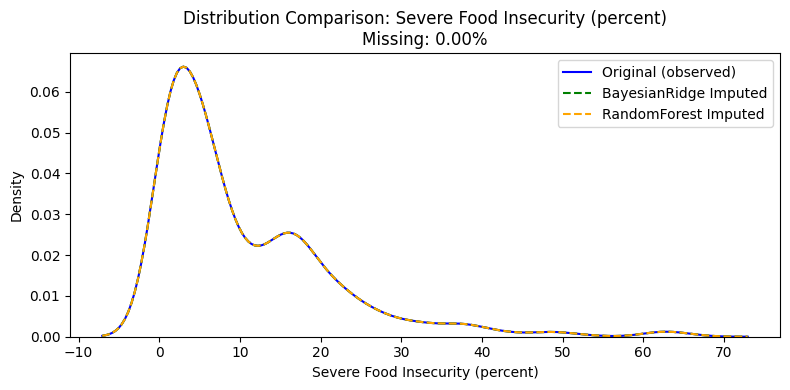

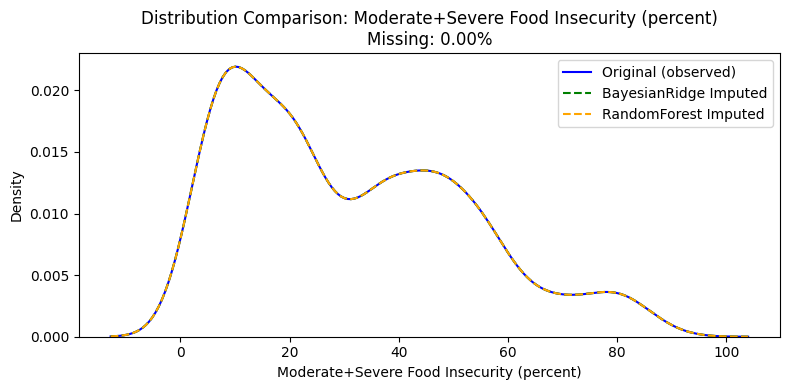

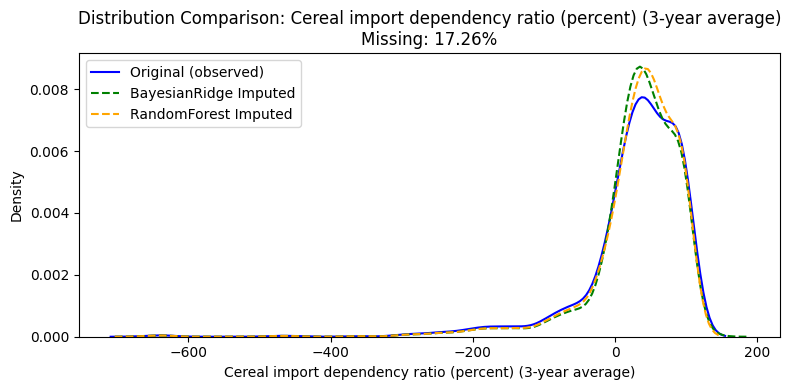

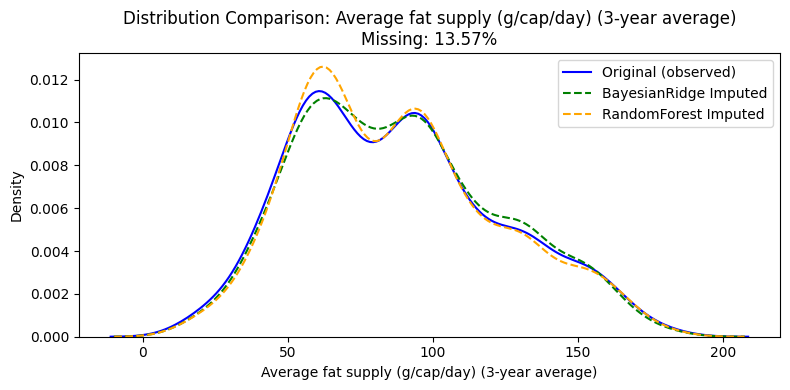

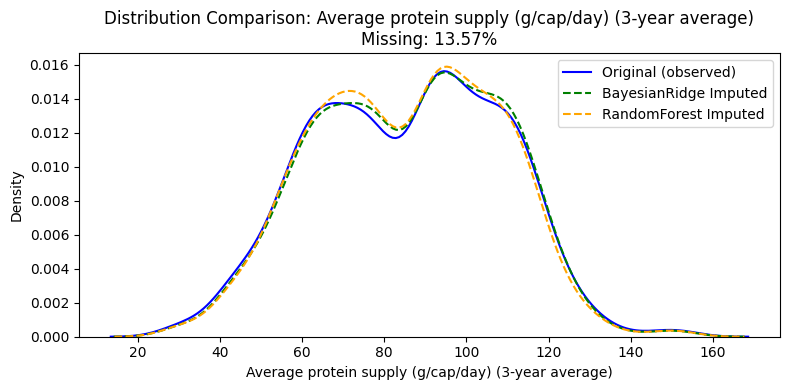

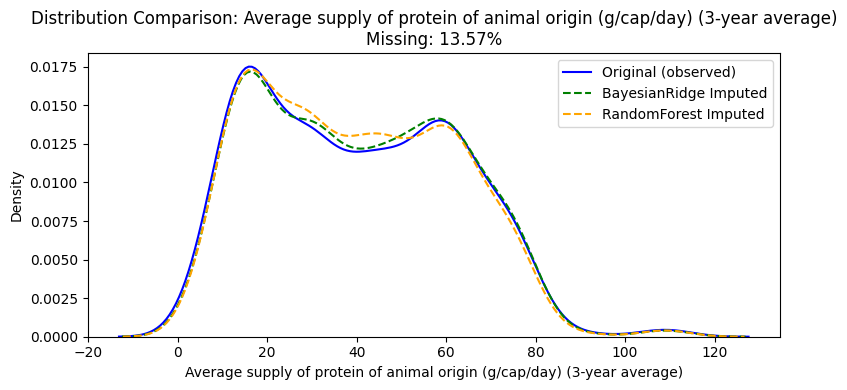

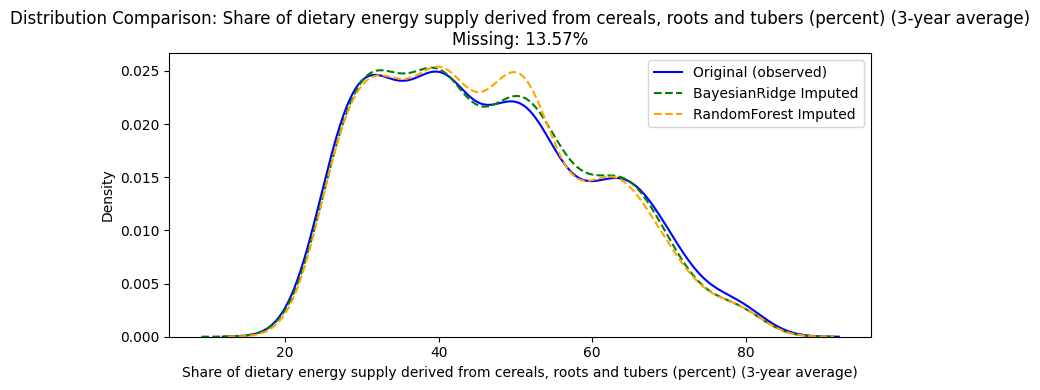

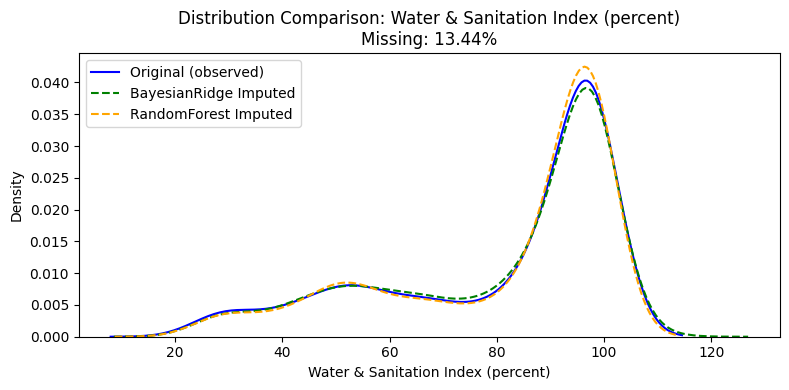

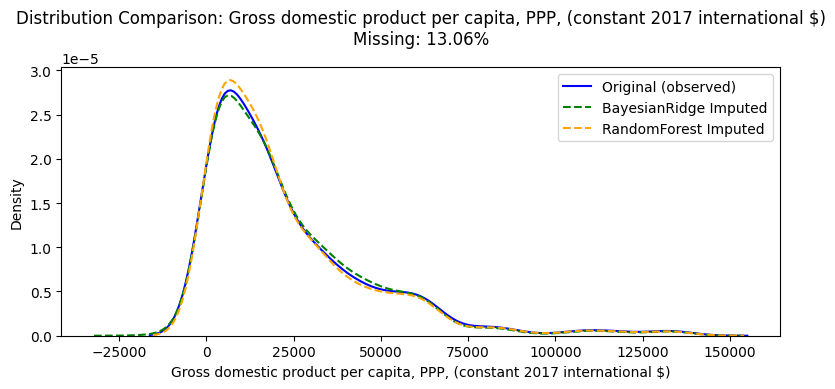

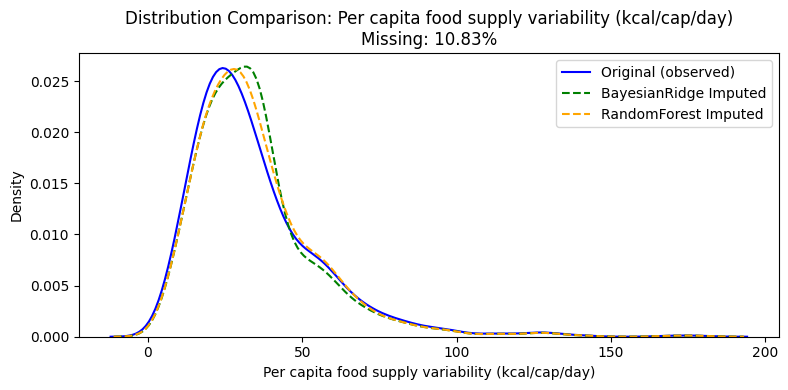

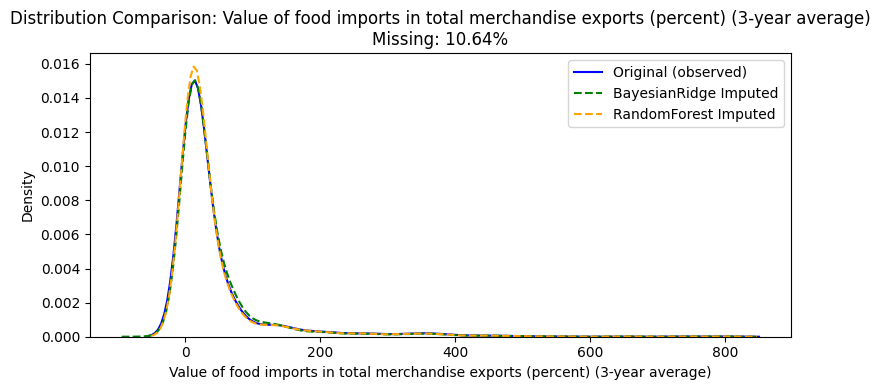

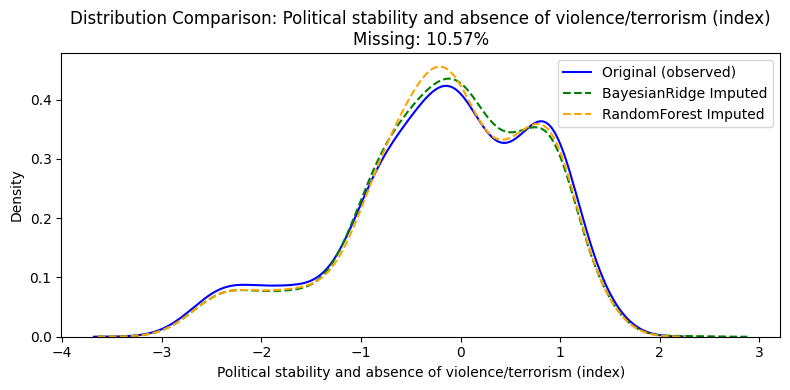

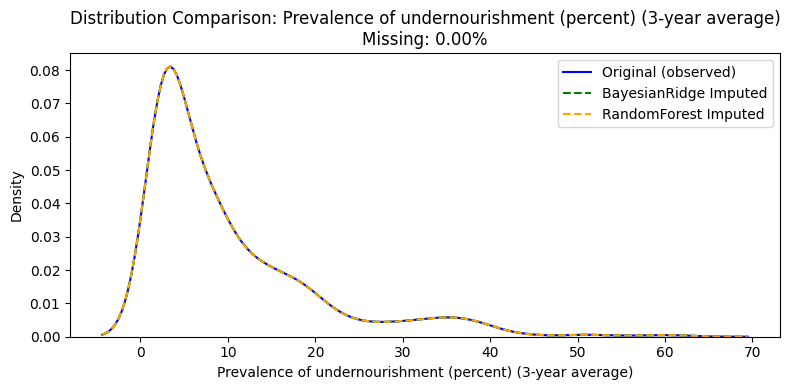

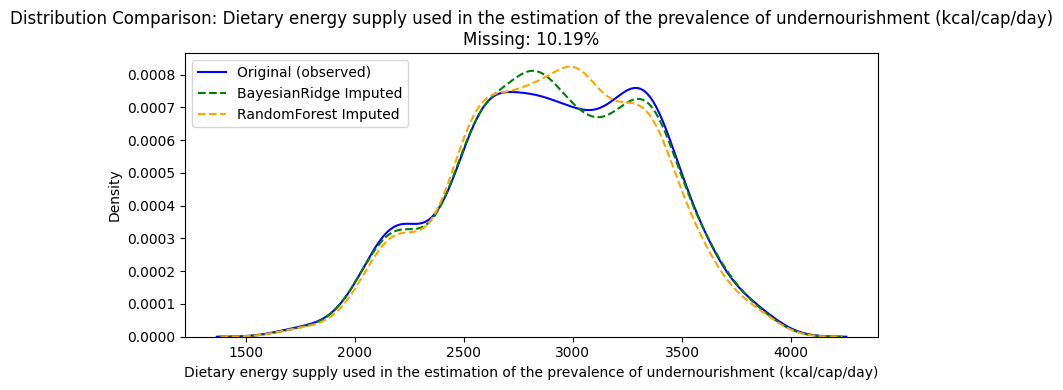

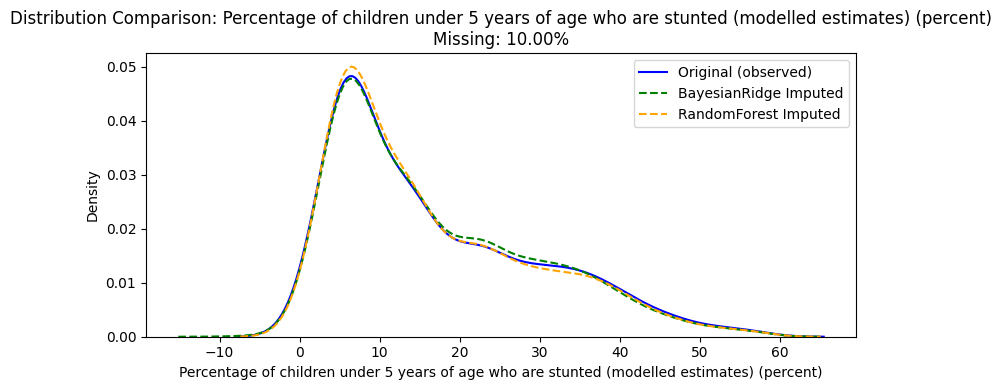

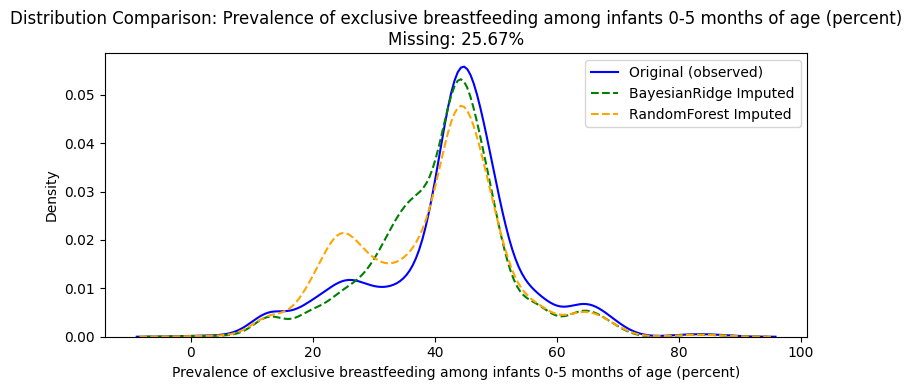

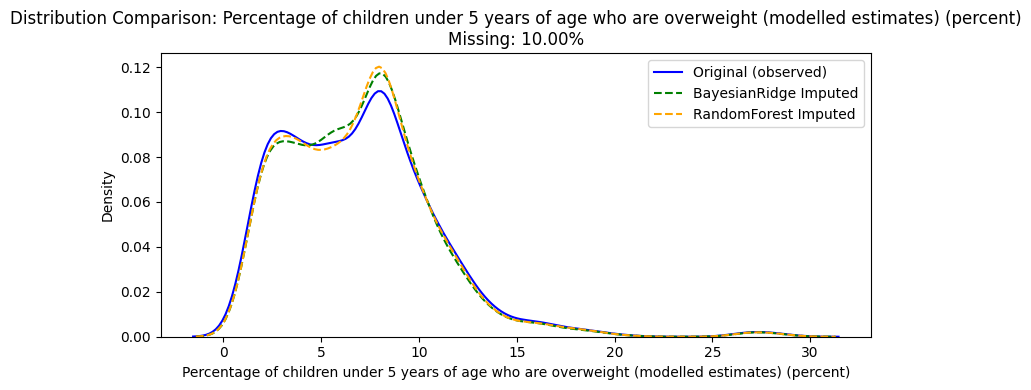

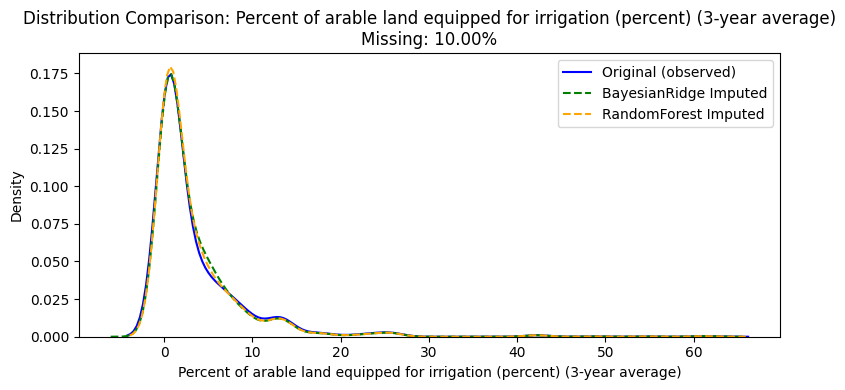

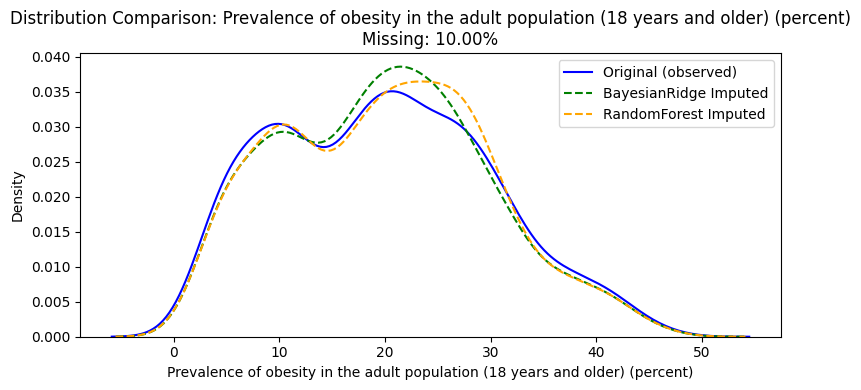

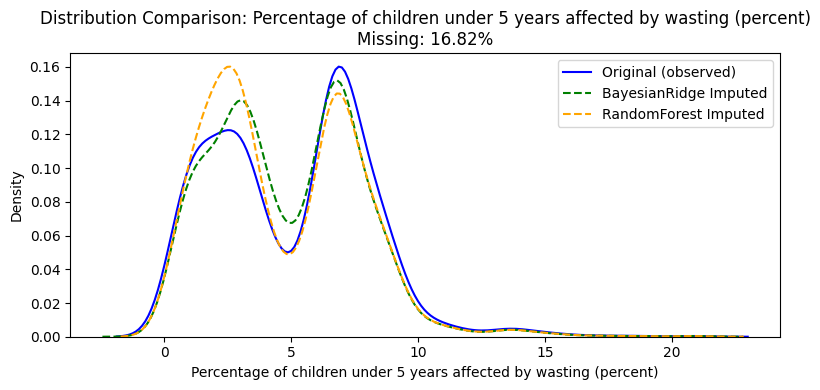

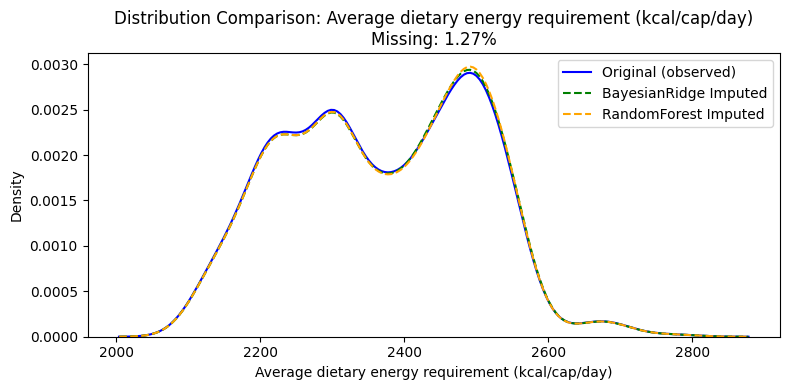

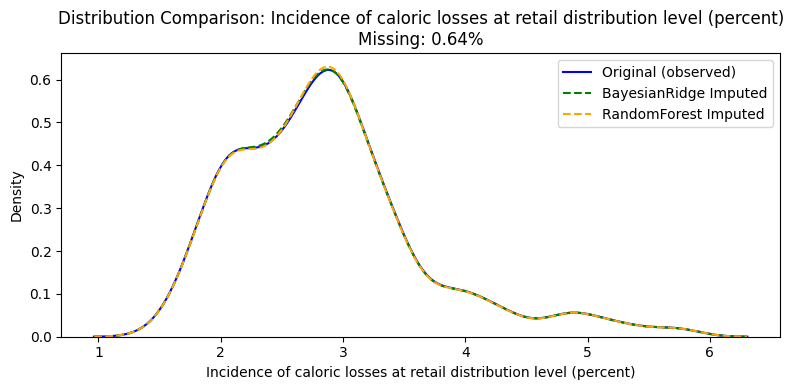

In [51]:
# Check every variable
for col in columns_to_impute:
    plt.figure(figsize=(8, 4))
    
    missing_pct = df_subset[col].isna().mean() * 100

    # Compare between the non-nulls and imputed
    sns.kdeplot(df_subset[col].dropna(), label='Original (observed)', color='blue')
    
    # Plot imputed full distributions (includes imputed + original)
    sns.kdeplot(df_br_imputed[col], label='BayesianRidge Imputed', color='green', linestyle='--')
    sns.kdeplot(df_rf_imputed[col], label='RandomForest Imputed', color='orange', linestyle='--')
    
    plt.title(f'Distribution Comparison: {col}\nMissing: {missing_pct:.2f}%')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

### 2.3.4 Deciding on the imputation method

So the point is based on the above distribution, decide to use either method on each variable to get best result.

After the imputation, i will proceed to aggregate some variables.

I deleted and aggregated some in the very beginning because it would not affect the imputation and it makes things easier without deviating from the original data. (as in the scale/ range would not change, eventhough the value itself is a sum/mean of certain variables.) and yes, it will cause a few outliers if we aggregate columns with NA and non-null value, but after inspection, it is only a few cases so it wont be an issue

In [52]:
## Separate columns to impute based on estimator performance
br_columns = [
    'Severe Food Insecurity (percent)',
    'Moderate+Severe Food Insecurity (percent)',
    'Average fat supply (g/cap/day) (3-year average)',
    'Average protein supply (g/cap/day) (3-year average)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
    'Water & Sanitation Index (percent)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)',
    'Value of food imports in total merchandise exports (percent) (3-year average)',
    'Political stability and absence of violence/terrorism (index)',
    'Prevalence of undernourishment (percent) (3-year average)',
    'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)'
]

rf_columns = [col for col in columns_to_impute if col not in br_columns]

In [53]:
## Substitute different imputation into the df
df_final_imputed = df_subset.copy()

for col in br_columns:
    df_final_imputed[col] = df_br_imputed[col]

for col in rf_columns:
    df_final_imputed[col] = df_rf_imputed[col]

In [54]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])


In [55]:
df_cleaned.isna().sum()

index                                                                                                0
Year                                                                                                 0
Continent                                                                                            0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of underno

## 2.4 Checking range to view if imputation is valid

In [56]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

index: min = 2198, max = 3767
Year: min = 2014, max = 2023
Continent: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = -16104.245176487108, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for irrig

In [57]:
invalid_conditions = {
    'Gross domestic product per capita, PPP, (constant 2017 international $)': lambda x: x < 0,
    'Percent of arable land equipped for irrigation (percent) (3-year average)': lambda x: x < 0,
    'Prevalence of undernourishment (percent) (3-year average)': lambda x: x < 0,
    'Value of food imports in total merchandise exports (percent) (3-year average)': lambda x: x < 0,
    'Severe Food Insecurity (percent)': lambda x: x < 0,
    'Water & Sanitation Index (percent)': lambda x: x > 100
}

# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_new[condition(df_new[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])

In [58]:
# Loop and print invalid values for each column
for col, condition in invalid_conditions.items():
    invalid_rows = df_cleaned[condition(df_cleaned[col])]
    if not invalid_rows.empty:
        print(f"\nInvalid values for: {col}")
        print(invalid_rows[[col]])


Invalid values for: Gross domestic product per capita, PPP, (constant 2017 international $)
      Gross domestic product per capita, PPP, (constant 2017 international $)
515                                          -89.424022                      
672                                          -55.817386                      
829                                         -494.276188                      
1187                                       -3621.456169                      
1307                                      -16104.245176                      
1344                                       -7889.669837                      
1414                                       -6714.184730                      
1415                                        -864.923416                      
1418                                      -10043.340704                      
1421                                       -5405.406689                      
1423                                       -8121.

### 2.4.1 Clipping range so that is it bounded in valid range

In [60]:
clip_ranges = {
    "Gross domestic product per capita, PPP, (constant 2017 international $)": (0, None),
    "Percent of arable land equipped for irrigation (percent) (3-year average)": (0, 100),
    "Prevalence of undernourishment (percent) (3-year average)": (0, 100),
    "Value of food imports in total merchandise exports (percent) (3-year average)": (0, None),  # actual max if needed
    'Severe Food Insecurity (percent)':(0,100),
    'Water & Sanitation Index (percent)': (0,100)
}

# Apply clipping to each column
for col, (low, high) in clip_ranges.items():
    df_final_imputed[col] = df_final_imputed[col].clip(lower=low, upper=high)

In [61]:
df_non_imputed = df_new.drop(columns=columns_to_impute)
df_cleaned = pd.concat([df_non_imputed, df_final_imputed], axis=1)


df_cleaned = df_cleaned[df_new.columns]
df_cleaned = df_cleaned.drop(columns=[col for col in df_cleaned.columns if col.endswith('_missing')])

In [63]:
df_cleaned.isna().sum()

index                                                                                                0
Year                                                                                                 0
Continent                                                                                            0
Area                                                                                                 0
Average dietary energy requirement (kcal/cap/day)                                                    0
Average fat supply (g/cap/day) (3-year average)                                                      0
Average protein supply (g/cap/day) (3-year average)                                                  0
Average supply of protein of animal origin (g/cap/day) (3-year average)                              0
Cereal import dependency ratio (percent) (3-year average)                                            0
Dietary energy supply used in the estimation of the prevalence of underno

In [64]:
for col in df_cleaned.columns:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min = {col_min}, max = {col_max}")

index: min = 2198, max = 3767
Year: min = 2014, max = 2023
Continent: min = Africa, max = South_America
Area: min = Afghanistan, max = Zimbabwe
Average dietary energy requirement (kcal/cap/day): min = 2095.0, max = 2787.0
Average fat supply (g/cap/day) (3-year average): min = 14.1, max = 183.6
Average protein supply (g/cap/day) (3-year average): min = 29.6, max = 152.4
Average supply of protein of animal origin (g/cap/day) (3-year average): min = 2.6, max = 111.9
Cereal import dependency ratio (percent) (3-year average): min = -654.8, max = 100.0
Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day): min = 1685.0, max = 3936.0
Gross domestic product per capita, PPP, (constant 2017 international $): min = 0.0, max = 137947.0
Incidence of caloric losses at retail distribution level (percent): min = 1.51, max = 5.76
Per capita food supply variability (kcal/cap/day): min = 3.0, max = 179.0
Percent of arable land equipped for irrigation (percent) 

## 2.5 Saving cleaned dataset

In [65]:
df_cleaned.to_csv("Final_Cleaned.csv",index=False)

# **Step 7: Predictive Modelling**

Attempting to predict food insecurity.

# Step Saving Output

In [32]:
# Calculate and store elapsed time
elapsed = time.time() - start_time
print(f"Completed in {elapsed:.2f} seconds at {datetime.now().strftime('%H:%M:%S')}")

# Calculate and store elapsed time
elapsed = time.time() - start_time
print(f"Completed in {elapsed:.2f} seconds at {datetime.now().strftime('%H:%M:%S')}")

# Save for next run
with open(Runtime_file, "w") as f:
    f.write(str(elapsed))

print(f"Runtime log saved successfully to: {Runtime_file}")


Completed in 521.44 seconds at 16:32:26
Completed in 521.44 seconds at 16:32:26
Runtime log saved successfully to: C:\Users\Callum\Personal\Learning\University of Malaya\Data Science\2025 Semester 2\WQD7003 - Data Analytics\Assignments\Group Project\4. Saved Output\last_runtime.txt
